<a href="https://colab.research.google.com/github/eyecandycoder/Abhishek/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset  = pd.read_csv("Social_Network_Ads.csv")

In [3]:
X = dataset.iloc[ : , :-1]

In [4]:
y = dataset.iloc[ : , -1]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state =0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
Classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [9]:
Classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [12]:
print(Classifier.predict(sc.transform([[30, 87000]])))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
y_pred = Classifier.predict(X_test)

In [15]:
y_test = y_test.to_numpy()

In [16]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
cm = confusion_matrix(y_pred, y_test)

In [19]:
print(cm)
accuracy_score(y_pred, y_test)

[[54  3]
 [ 4 19]]


0.9125

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-20-10ae77ab89fc>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0] , X_set[y_set == j,1], c = ListedColormap(('red' , 'green'))(i), label = j)


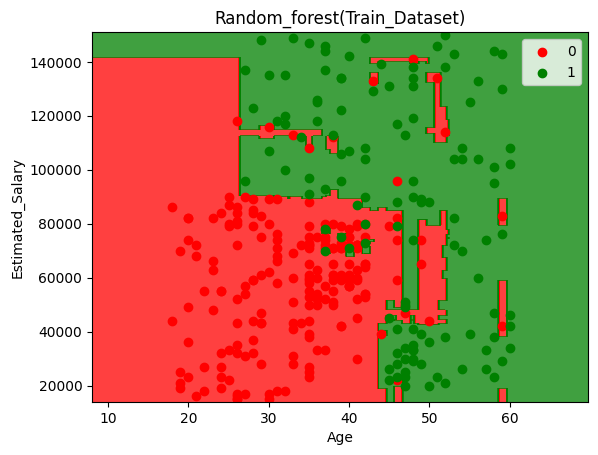

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train),y_train
X1, X2 = np.meshgrid( np.arange( start = X_set[ : , 0].min() -10 , stop = X_set[ : , 0].max() +10, step = 0.25 ) ,
                     np.arange( start = X_set[ : , 1].min() -1000 , stop = X_set[ : , 1].max() +1000, step = 0.25 ))
plt.contourf(X1, X2, Classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75,
                                        cmap = ListedColormap(('red' , 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0] , X_set[y_set == j,1], c = ListedColormap(('red' , 'green'))(i), label = j)
plt.title('Random_forest(Train_Dataset)')
plt.xlabel('Age')
plt.ylabel('Estimated_Salary')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-21-a3f8be74d60d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0] , X_set[y_set == j,1], c = ListedColormap(('red' , 'green'))(i), label = j)


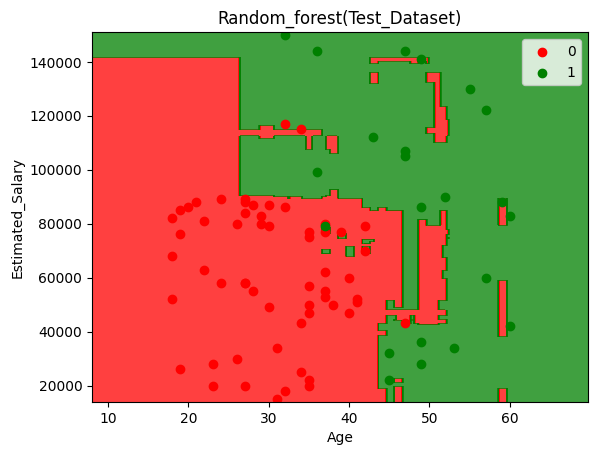

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test),y_test
X1, X2 = np.meshgrid( np.arange( start = X_set[ : , 0].min() -10 , stop = X_set[ : , 0].max() +10, step = 0.25 ) ,
                     np.arange( start = X_set[ : , 1].min() -1000 , stop = X_set[ : , 1].max() +1000, step = 0.25 ))
plt.contourf(X1, X2, Classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75,
                                        cmap = ListedColormap(('red' , 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0] , X_set[y_set == j,1], c = ListedColormap(('red' , 'green'))(i), label = j)
plt.title('Random_forest(Test_Dataset)')
plt.xlabel('Age')
plt.ylabel('Estimated_Salary')
plt.legend()
plt.show()